In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import splrep, splev, interp2d,LSQBivariateSpline
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

import light_echo as le

/Users/home/miniconda3/envs/datasci/lib/python3.8/site-packages/pysynphot/locations.py:46: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/Users/home/miniconda3/envs/datasci/lib/python3.8/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [2]:
import os
import json
import glob
import pandas as pd

In [3]:
import skimage
#from skimage import data, io, filters

In [4]:
from spectra_utils import * 

In [5]:
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

- specnew:dict, spectra after scaled to photometry
- waves: 
- phases: 
- X: wavelength, meshgrid
- Y: original phases, meshgrid, 
- Z: original flux, 

- X2: wavelength, meshgrid
- Y2: interpolated phases, meshgrid, 
- Z2: interpolated flux, 

In [6]:
typ = 'Ia'
#snid = '2008D'
snid = '2011fe'

spec = np.load(f'LEtemp/{typ}/LEtemplate_SN{snid}.npz', allow_pickle=True)

sntype = spec['sntype']
# specnew = spec['specnew'].item()

X = spec['X']
Y = spec['Y']
Z = spec['Z']

X2 = spec['X2']
Y2 = spec['Y2']
Z2 = spec['Z2']

Text(0.5, 1.0, 'SN2011fe')

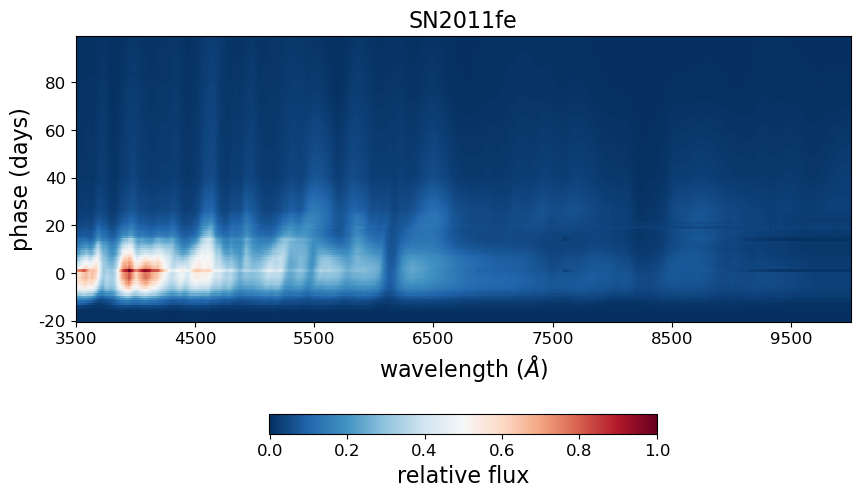

In [7]:

plt.figure(figsize=[10,8])
plt.imshow(Z2/Z2.max(), aspect=10, origin='lower', 
           interpolation='none', cmap=matplotlib.cm.RdBu_r)
xticks = [0, 500, 1000, 1500, 2000, 2500, 3000]
plt.xticks(xticks, labels=np.int32(X2[0][xticks]));
plt.xlabel(r'wavelength ($\AA$)')
yticks = [0, 20, 40, 60, 80, 100]
plt.yticks(yticks, labels=Y2[:, 0][yticks])
plt.ylabel(r'phase (days)')

cbar = plt.colorbar(orientation='horizontal', shrink=0.5)
cbar.set_label('relative flux')
plt.title(f'SN{snid}', fontsize=16)
#plt.savefig(f"../../../../Desktop/thesis/figures/spectra_heatmap_{snid}.png", dpi=300, )

In [11]:
lechos = []
lecho_d1 = le.mklecho_tophat(X2, Y2, Z2, p_int = [-20,10])
lecho_d3 = le.mklecho_tophat(X2, Y2, Z2, p_int = [-20, 100])
lechos.append([X2[0][100:], lecho_d1[100:]])
lechos.append([X2[0][100:], lecho_d3[100:]])

(0.0, 1.13)

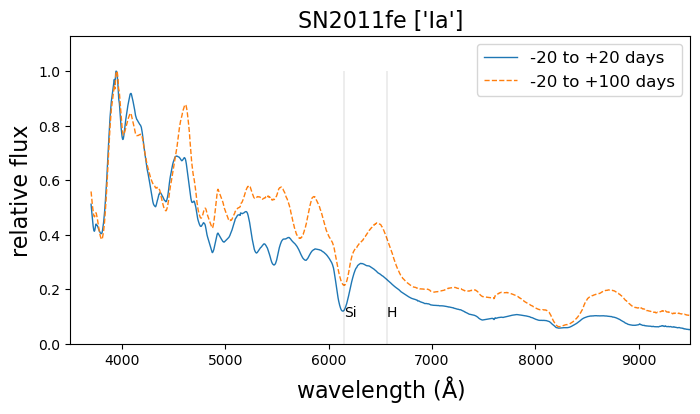

In [12]:
#fig, ax, = le.basic_format(size=[8,4])

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
labels = ['-20 to +20 days', '-20 to +100 days']
ls = ['-','--', '-']

for i, lecho in enumerate(lechos):
    scale = 1./np.amax(lecho[1])
#     scale = 1.
    plt.plot(lecho[0], scale*lecho[1], label = labels[i], linestyle=ls[i], lw=1)
    
plt.xlabel('wavelength ($\mathrm{\AA}$)', fontsize=16)
plt.ylabel('relative flux', fontsize = 16)
plt.legend(fontsize=12, frameon=True, loc='upper right')
plt.xlim(3500,9500)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title(f'SN{snid} {sntype}', fontsize=16)


# plot spectral lines


plt.text(x=6563, y=0.1, s='H')
plt.vlines(x=6563, ymin=0, ymax=1, colors='k', linewidth=.1)

#plt.text(x=5876, y=0.1, s='He')
#plt.vlines(x=5876, ymin=0, ymax=1, colors='k', linewidth=.1)

plt.text(x=6150, y=0.1, s='Si')
plt.vlines(x=6150, ymin=0, ymax=1, colors='k', linewidth=.1)


#plt.text(x=5454, y=0.1, s='S')
#plt.vlines(x=5454, ymin=0, ymax=1, colors='k', linewidth=.1)

#plt.text(x=5620, y=0.1, s='S')
#plt.vlines(x=5620, ymin=0, ymax=1, colors='k', linewidth=.1)


#for x in [5577, 6300, 7775]:
#    plt.vlines(x=x, ymin=0, ymax=1, colors='k', linewidth=.2)
#    plt.text(x=x, y=0.1, s=fr'O I')


plt.ylim([0, 1.13])

#plt.savefig(f'../../../../Desktop/thesis/figures/{snid}_lecho.png', dpi = 300, bbox_inches = 'tight')
# plt.savefig('plots/1994d_lecho.png', dpi = 300, bbox_inches = 'tight')